#### 1) Estimate the angle (with respect to the horizontal axis) of the billard cue in image1. To verify your answer, rotate the input image accordingly. The result should be similar to image2.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('image1.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

fig, axes = plt.subplots(1, 3, figsize=(13,7))
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Image 1'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(edges, cmap = 'gray')
plt.title('Edges'), plt.xticks([]), plt.yticks([])

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img,(x1,y1),(x2,y2),(255,0,0),2)

plt.subplot(133),plt.imshow(img)
plt.title('Detected Lines'), plt.xticks([]), plt.yticks([])

plt.show()

print(theta)

<Figure size 1300x700 with 3 Axes>

0.6806784


The origine is considered to be the upper left corner. Theta is the the angle formed by the perpendicular distance from the origine to the line and the horizontal axis in rad. 

theta = 0.6806784, approximately 40 degrees

So the angle of the billard cue in image1 with respect to the horizontal axis is 50 degrees: there is a triangle on the upper left corner with angles: 90, 40 and 50 degrees (equal to the angle of the billard cue in image1 with respect to the horizontal axis ως εντός εναλλάξ). 

#### 2) Combine image1 and image2 to generate an image similar to image3.

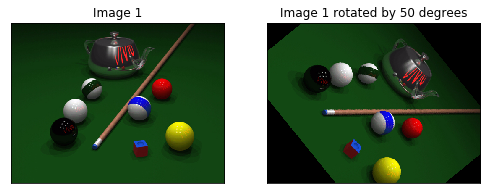

In [2]:
# import the Python Image processing Library
from PIL import Image

img1  = Image.open('image1.png')

# Rotate it by 50 degrees clockwise
rotated = img1.rotate(-51)

# Display the Original Image
fig, axes = plt.subplots(1, 2, figsize=(13,7))
plt.subplot(131),plt.imshow(img1)
plt.title('Image 1'), plt.xticks([]), plt.yticks([])

# Display the Image rotated by 50 degrees
plt.subplot(132),plt.imshow(rotated)
plt.title('Image 1 rotated by 50 degrees'), plt.xticks([]), plt.yticks([])

rotated.save('image1_rotated.png')

In [3]:
import skimage.util as util

im2arr = np.array(rotated)

im2= util.img_as_float(im2arr)

In [4]:
# Get the Red, Green and Blue channels
r_im2 = im2[:,:,0]
g_im2 = im2[:,:,1]
b_im2 = im2[:,:,2]

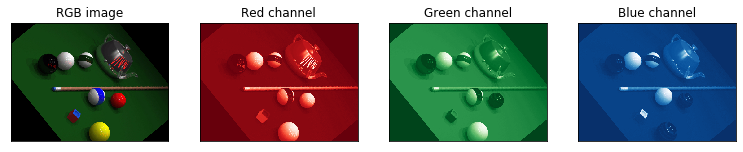

In [5]:
# display the RGB channels    
titles = ['RGB image', 'Red channel', 'Green channel', 'Blue channel']
cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

fig, axes = plt.subplots(1, 4, figsize=(13,3))
objs = zip(axes, (im2, r_im2, g_im2, b_im2), titles, cmaps)

for ax, channel, title, cmap in objs:
    ax.imshow(channel, cmap=cmap)
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())

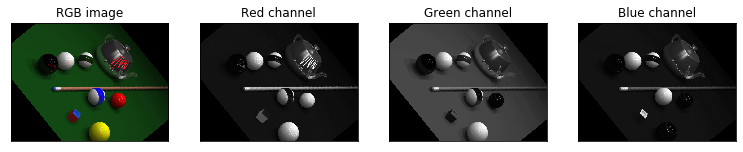

In [6]:
titles = ['RGB image', 'Red channel', 'Green channel', 'Blue channel']
cmaps = [None, plt.cm.gray, plt.cm.gray, plt.cm.gray]

fig, axes = plt.subplots(1, 4, figsize=(13,3))
objs = zip(axes, (im2, r_im2, g_im2, b_im2), titles, cmaps)

for ax, channel, title, cmap in objs:
    ax.imshow(channel, cmap=cmap)
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())

In [7]:
# Suroundings turned black
g_im2[0:208,0:] = 0
g_im2[220:,0:] = 0
g_im2[208:220,0:130] = 0

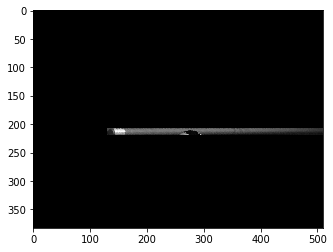

In [8]:
plt.imshow(g_im2,cmap='gray')